# Nexus Correlations
10.11.2022, a. stein

In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

import xarray as xr
import pandas as pd

from tqdm.autonotebook import tqdm

import sys
sys.path.append('../../')
import ndrought.wrangle as wrangle
import ndrought.compare as compare
import ndrought.plotting as ndplot

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


/tmp/ipykernel_221848/4191526318.py:9: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [2]:
dm_path = '/pool0/home/steinadi/data/drought/drought_impact/data/drought_measures'
r_path = f'{dm_path}/ndrought_products/paired_r'

In [3]:
intervals = ['14d', '30d', '90d', '180d', '270d', '1y', '2y', '5y', ]
grace_vars = ['gws', 'rtzsm', 'sfsm']

In [4]:
dm_vars = ['usdm', 'spi', 'spei', 'eddi', 'pdsi', 'grace']

In [5]:
dm_vars_expanded = {
    'usdm':['USDM'],
    'spi':[f'spi_{interval}' for interval in intervals],
    'spei':[f'spei_{interval}' for interval in intervals],
    'eddi':[f'eddi_{interval}' for interval in intervals],
    'pdsi':['pdsi'],
    'grace':grace_vars
}

In [6]:
paired_r = dict()

for var_a in dm_vars:
    paired_r[var_a] = dict()
    for var_b in dm_vars:
        paired_r[var_a][var_b] = xr.open_dataset(f'{r_path}/{var_a}_{var_b}_r.nc')

In [7]:
total_vars = 0 
for var in dm_vars:
    total_vars += len(dm_vars_expanded[var])

print(total_vars)

29


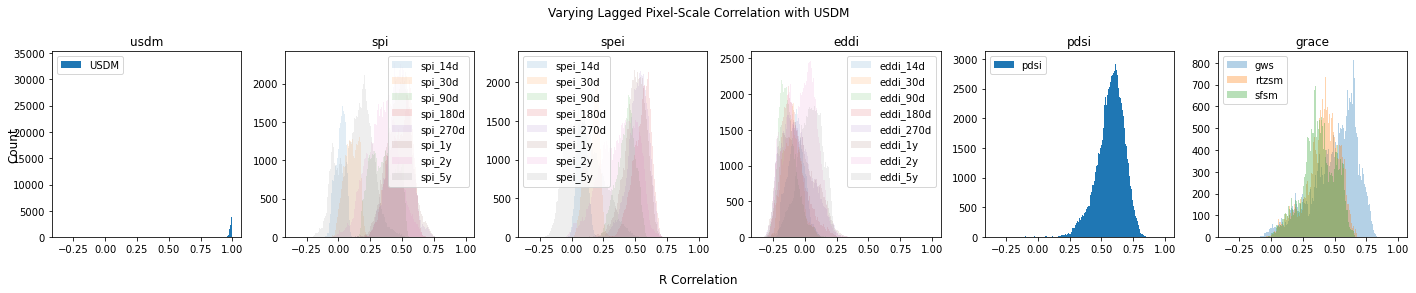

In [8]:
fig, axs = plt.subplots(1,6, figsize=(20,4), sharex=True)

for ax, var in zip(axs.ravel(), dm_vars):
    expanded_vars = dm_vars_expanded[var]
    i_alpha = 1/len(expanded_vars)

    for exp_var in expanded_vars:
        data = paired_r['usdm'][var][f'USDM_{exp_var}_r'].values.ravel()
        data_points = data[np.isnan(data) == False]
        ax.hist(data, alpha=i_alpha, label=exp_var, bins=int(np.sqrt(len(data_points))))
    ax.set_title(var)
    ax.legend()

fig.suptitle('Varying Lagged Pixel-Scale Correlation with USDM')
fig.supxlabel('R Correlation')
fig.supylabel('Count')
plt.tight_layout()

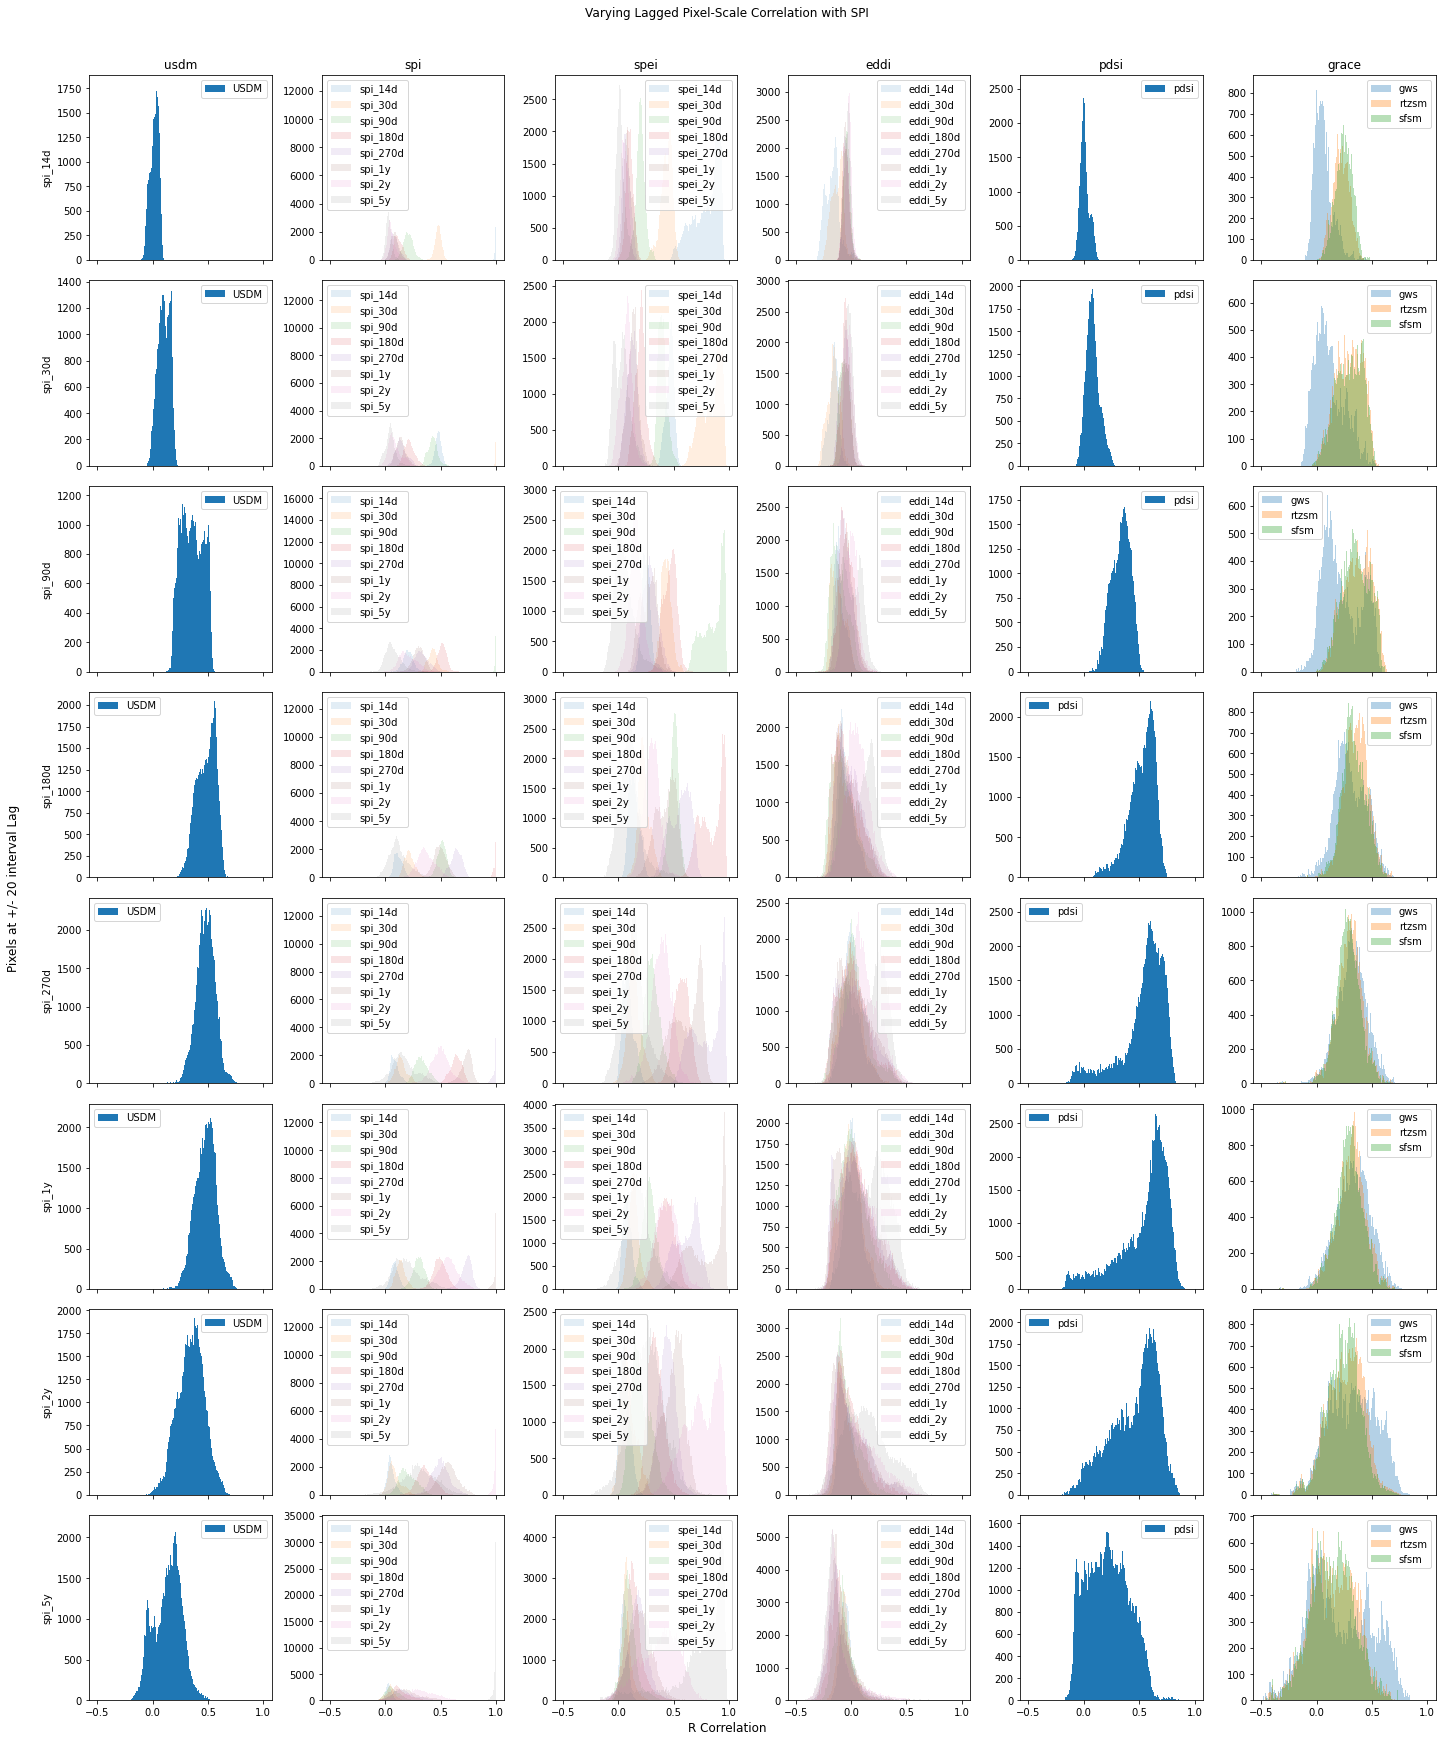

In [10]:
fig, axs = plt.subplots(8,6, figsize=(20,3*8), sharex=True)

for i, spi_var in enumerate(dm_vars_expanded['spi']):
    for j, var in enumerate(dm_vars):
        expanded_vars = dm_vars_expanded[var]
        i_alpha = 1/len(expanded_vars)

        for exp_var in expanded_vars:
            data = paired_r['spi'][var][f'{spi_var}_{exp_var}_r'].values.ravel()
            data_points = data[np.isnan(data) == False]
            axs[i,j].hist(data, alpha=i_alpha, label=exp_var, bins=int(np.sqrt(len(data_points))))
            
        axs[i,j].legend()

        if j == 0:
            axs[i,j].set_ylabel(spi_var)
        if i == 0:
            axs[i, j].set_title(var)

fig.suptitle('Varying Lagged Pixel-Scale Correlation with SPI', y = 1.01)
fig.supxlabel('R Correlation')
fig.supylabel('Pixels at +/- 20 interval Lag', x=0)
plt.tight_layout()

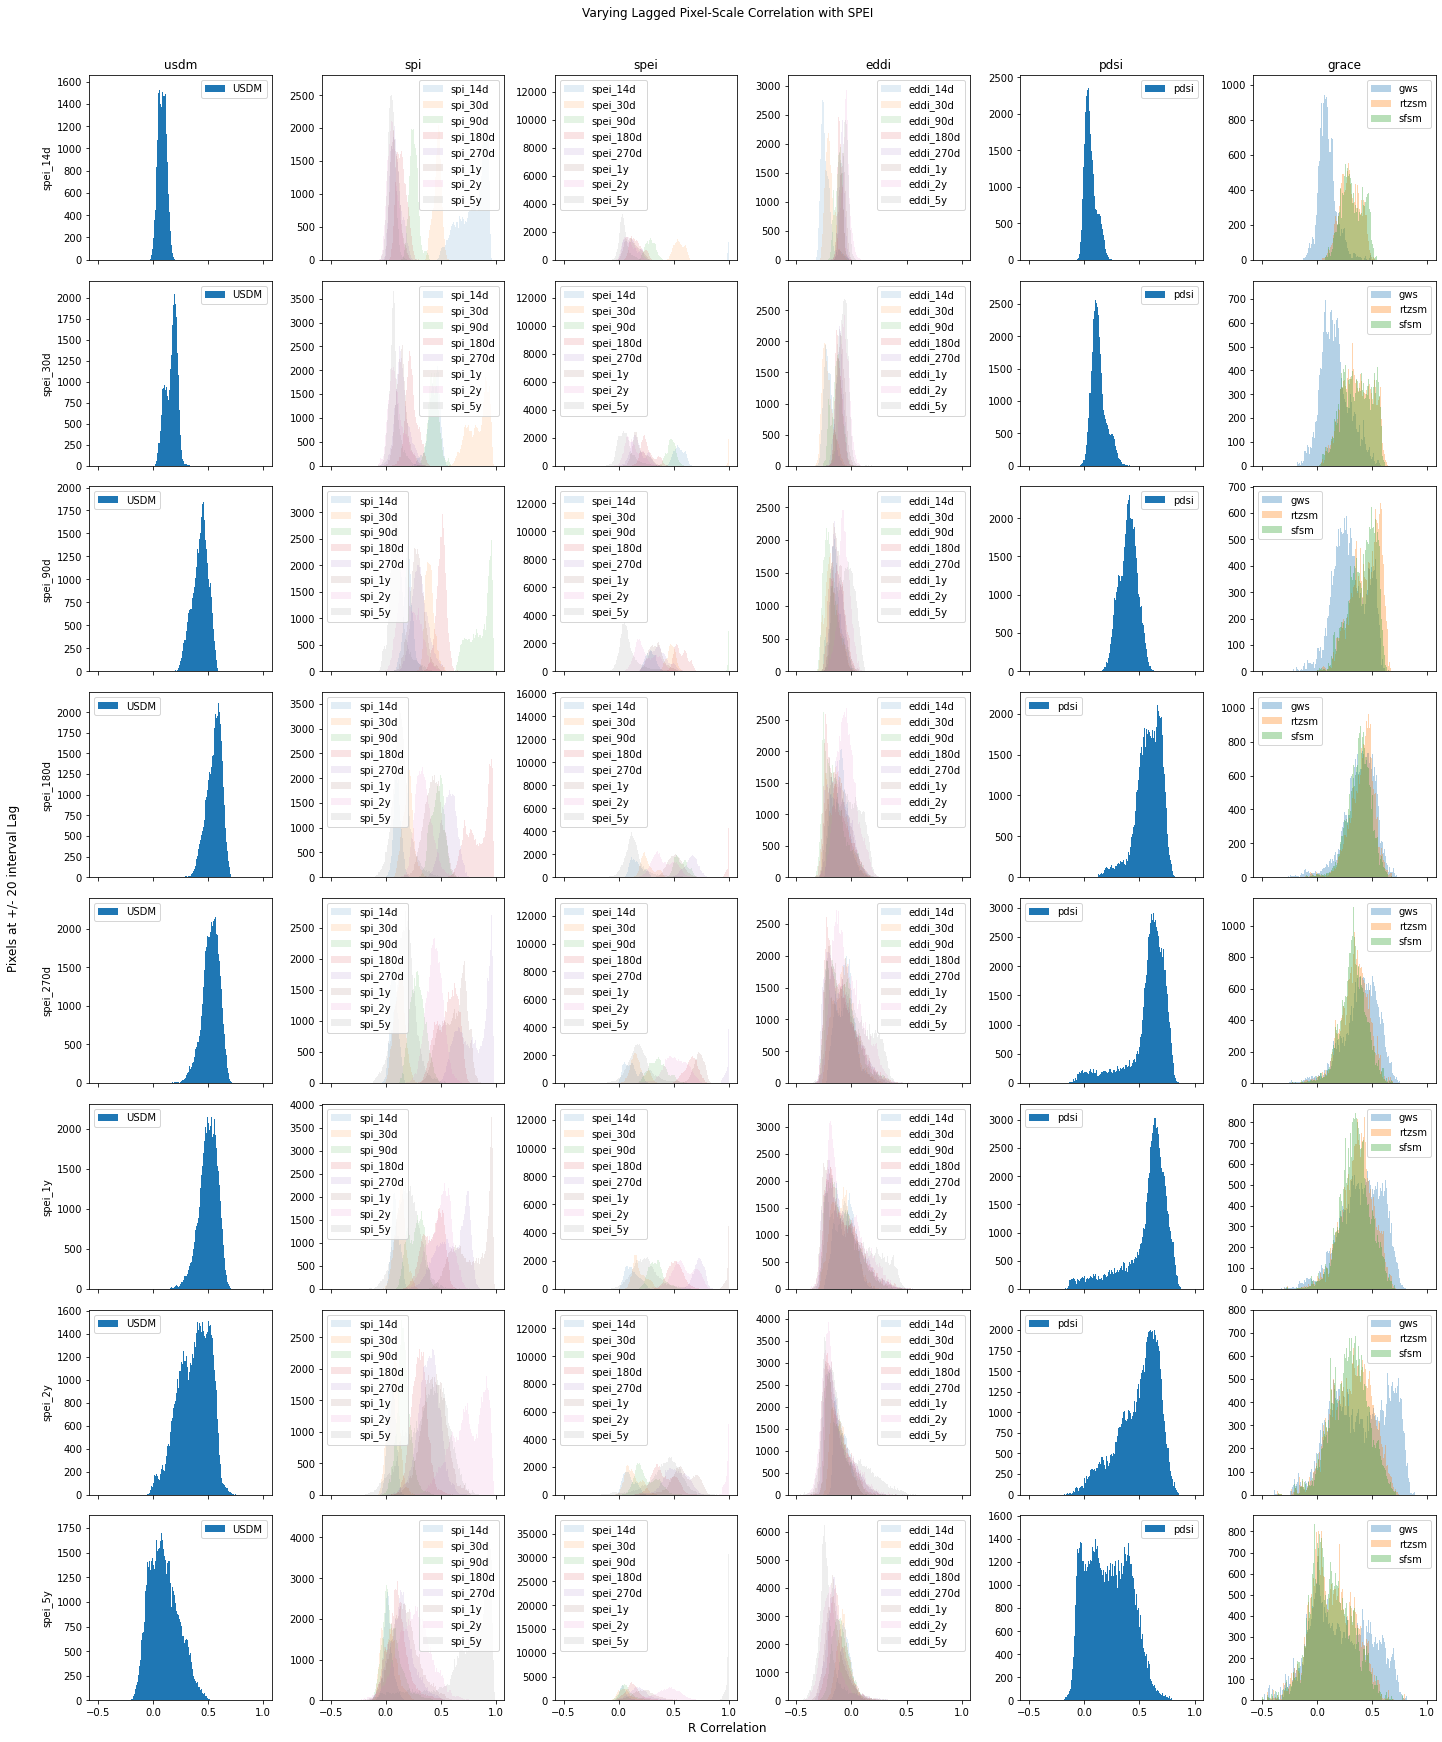

In [11]:
fig, axs = plt.subplots(8,6, figsize=(20,3*8), sharex=True)

for i, spi_var in enumerate(dm_vars_expanded['spei']):
    for j, var in enumerate(dm_vars):
        expanded_vars = dm_vars_expanded[var]
        i_alpha = 1/len(expanded_vars)

        for exp_var in expanded_vars:
            data = paired_r['spei'][var][f'{spi_var}_{exp_var}_r'].values.ravel()
            data_points = data[np.isnan(data) == False]
            axs[i,j].hist(data, alpha=i_alpha, label=exp_var, bins=int(np.sqrt(len(data_points))))
            
        axs[i,j].legend()

        if j == 0:
            axs[i,j].set_ylabel(spi_var)
        if i == 0:
            axs[i, j].set_title(var)

fig.suptitle('Varying Lagged Pixel-Scale Correlation with SPEI', y = 1.01)
fig.supxlabel('R Correlation')
fig.supylabel('Pixels at +/- 20 interval Lag', x=0)
plt.tight_layout()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


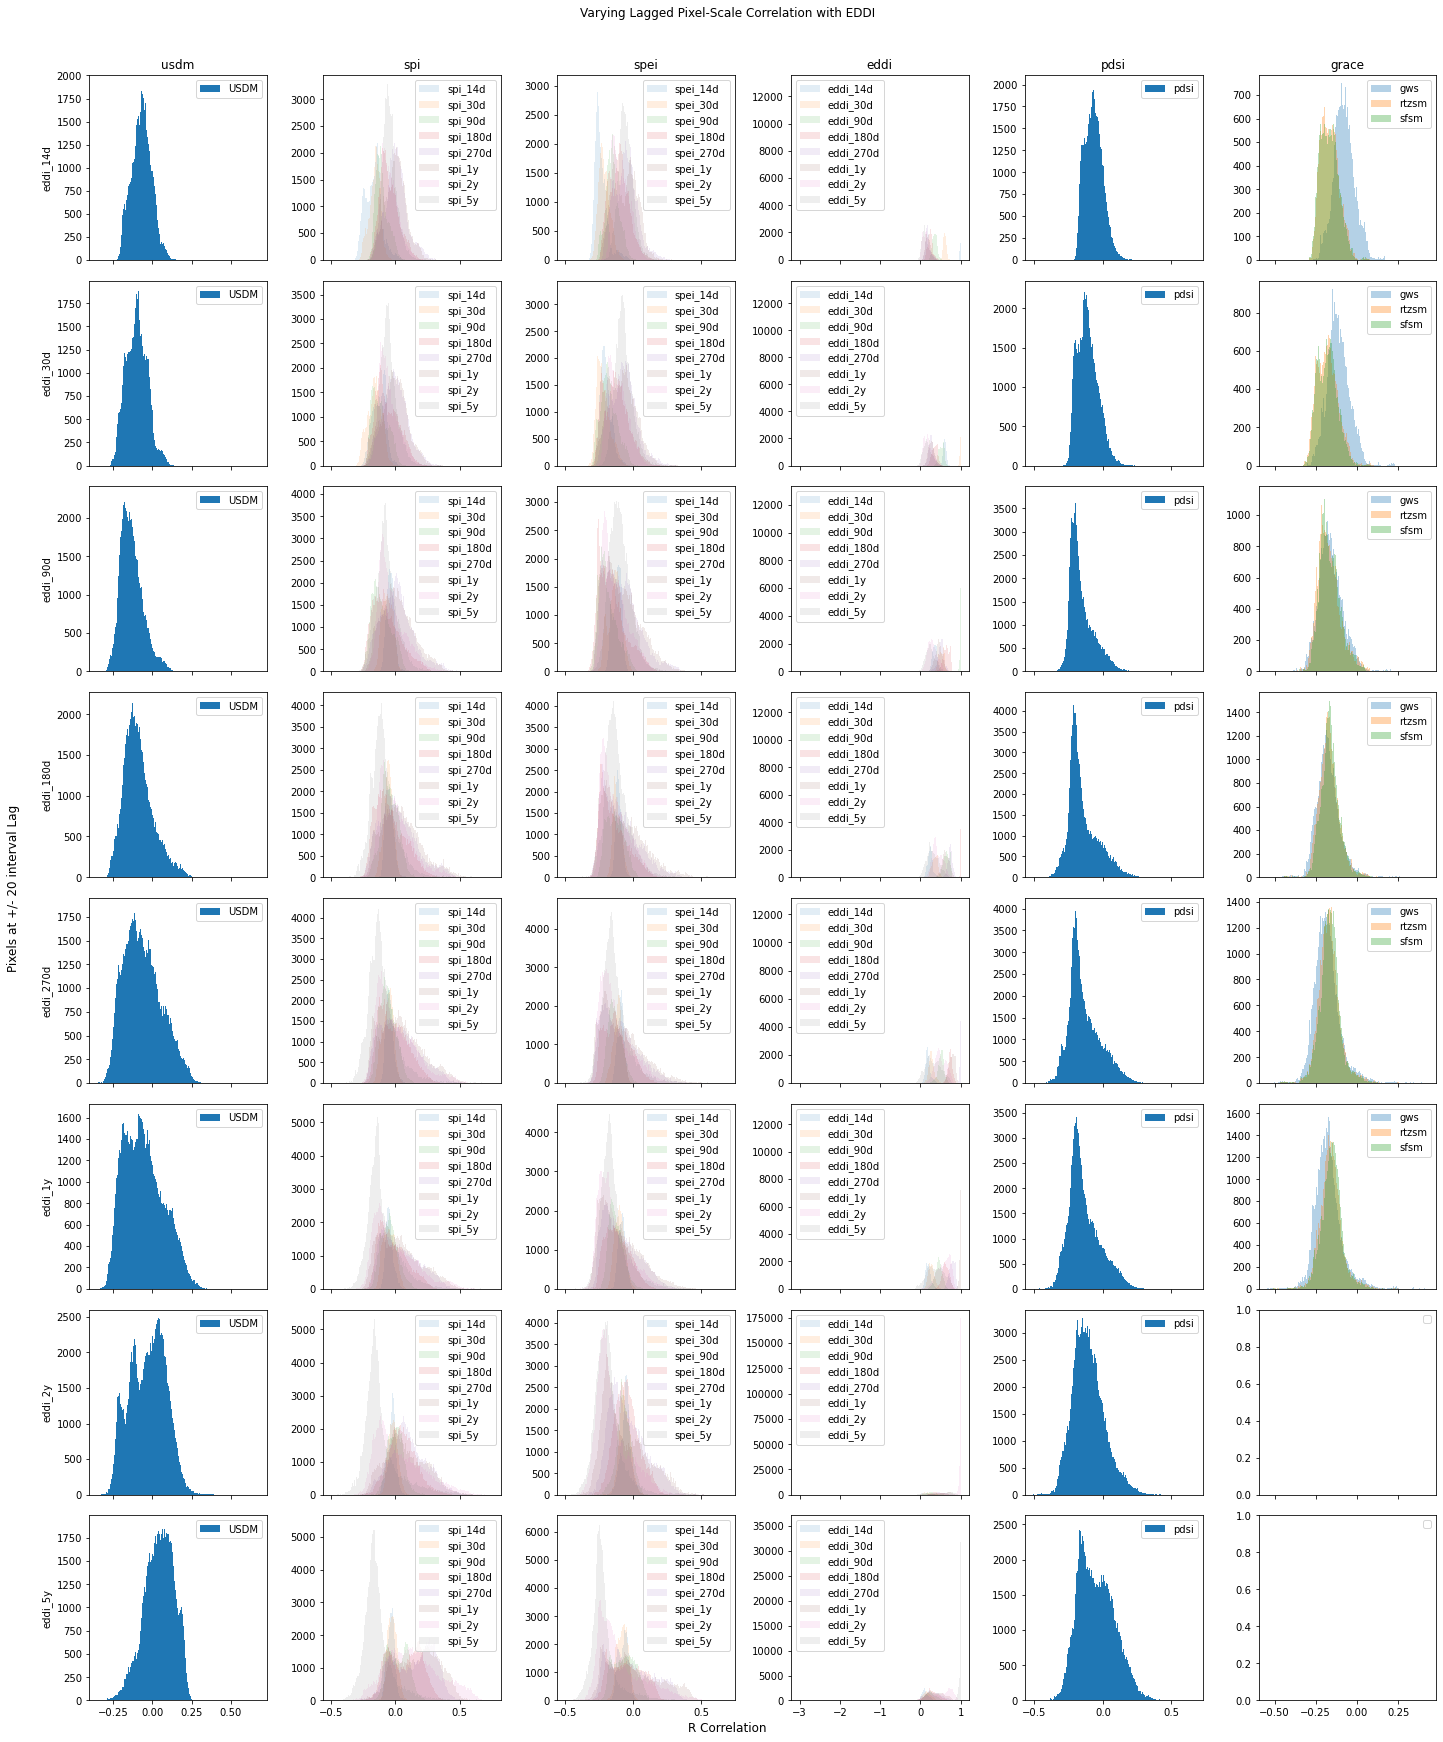

In [23]:
fig, axs = plt.subplots(8,6, figsize=(20,3*8), sharex='col')

for i, spi_var in enumerate(dm_vars_expanded['eddi']):
    for j, var in enumerate(dm_vars):
        expanded_vars = dm_vars_expanded[var]
        i_alpha = 1/len(expanded_vars)

        for exp_var in expanded_vars:
            try:
                data = paired_r['eddi'][var][f'{spi_var}_{exp_var}_r'].values.ravel()
                data_points = data[np.isnan(data) == False]
                axs[i,j].hist(data, alpha=i_alpha, label=exp_var, bins=int(np.sqrt(len(data_points))))
            except:
                pass
            
        axs[i,j].legend()

        if j == 0:
            axs[i,j].set_ylabel(spi_var)
        if i == 0:
            axs[i, j].set_title(var)

fig.suptitle('Varying Lagged Pixel-Scale Correlation with EDDI', y = 1.01)
fig.supxlabel('R Correlation')
fig.supylabel('Pixels at +/- 20 interval Lag', x=0)
plt.tight_layout()

In [20]:
eddi_grace_test = paired_r['eddi']['grace']['eddi_2y_gws_r'].values.ravel()
eddi_grace_test[np.isnan(eddi_grace_test) == False]

array([-0.24846728, -0.2498416 , -0.25097917, ..., -0.17064969,
       -0.17908337, -0.1710324 ])

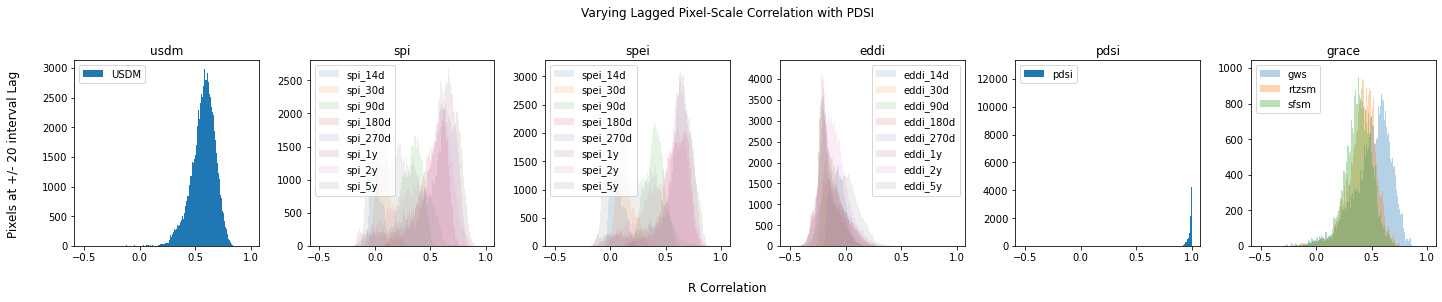

In [15]:
fig, axs = plt.subplots(1,6, figsize=(20,4), sharex=True)

for ax, var in zip(axs.ravel(), dm_vars):
    expanded_vars = dm_vars_expanded[var]
    i_alpha = 1/len(expanded_vars)

    for exp_var in expanded_vars:
        data = paired_r['pdsi'][var][f'pdsi_{exp_var}_r'].values.ravel()
        data_points = data[np.isnan(data) == False]
        ax.hist(data, alpha=i_alpha, label=exp_var, bins=int(np.sqrt(len(data_points))))
    
    ax.legend()
    ax.set_title(var)

fig.suptitle('Varying Lagged Pixel-Scale Correlation with PDSI', y = 1.01)
fig.supxlabel('R Correlation')
fig.supylabel('Pixels at +/- 20 interval Lag', x=0)
plt.tight_layout()

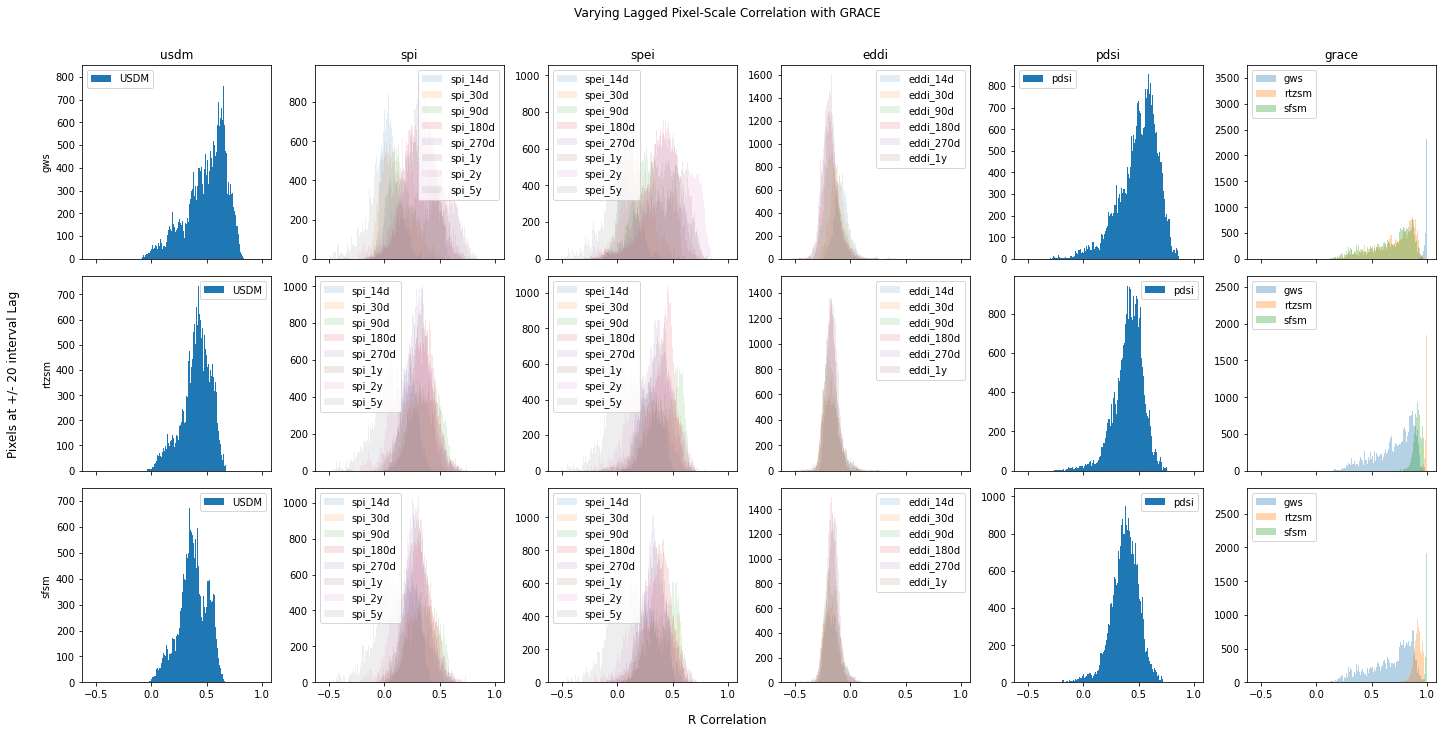

In [22]:
fig, axs = plt.subplots(3,6, figsize=(20,10), sharex=True)

for i, spi_var in enumerate(dm_vars_expanded['grace']):
    for j, var in enumerate(dm_vars):
        expanded_vars = dm_vars_expanded[var]
        i_alpha = 1/len(expanded_vars)

        for exp_var in expanded_vars:
            try:
                data = paired_r['grace'][var][f'{spi_var}_{exp_var}_r'].values.ravel()
                data_points = data[np.isnan(data) == False]
                axs[i,j].hist(data, alpha=i_alpha, label=exp_var, bins=int(np.sqrt(len(data_points))))
            except:
                pass
            
        axs[i,j].legend()

        if j == 0:
            axs[i,j].set_ylabel(spi_var)
        if i == 0:
            axs[i, j].set_title(var)

fig.suptitle('Varying Lagged Pixel-Scale Correlation with GRACE', y = 1.01)
fig.supxlabel('R Correlation')
fig.supylabel('Pixels at +/- 20 interval Lag', x=0)
plt.tight_layout()

Some issue between GRACE (all of them) and EDDI 2 and 5 year??